In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_ice = pd.read_csv('./icecream__utf8.csv')
df_ice

,version https://git-lfs.github.com/spec/v1
0,oid sha256:6b8aa56bf2f97145ef4a135f71b8b2c623b...
1,size 1518


In [2]:
# 月毎に仮定の平均消費額の読み出し
# インデックスは2003-1から月毎
y = pd.Series(df_ice.アイスクリーム.values, index=pd.date_range('2003-1', periods=len(df_ice), freq='M'))
y.plot()

AttributeError: 'DataFrame' object has no attribute 'アイスクリーム'

In [4]:
from statsmodels.tsa import stattools

# トレンド項あり（2次まで）、定数項ありの場合
ctt = stattools.adfuller(y[:100], regression="ctt")
# トレンド項あり（1次）、定数項ありの場合
ct = stattools.adfuller(y[:100], regression="ct")
# トレンド項なし、定数項ありの場合
c = stattools.adfuller(y[:100], regression="c")
# トレンド項なし、定数項なしの場合
nc = stattools.adfuller(y[:100], regression="nc")

print("ctt: ")
print(ctt)
print("ct: ")
print(ct)
print("c: ")
print(c)
print("nc: ")
print(nc)

ctt: 
(-3.3089558508822066, 0.1692244861968651, 11, 88, {'1%': -4.507929662788786, '5%': -3.9012866601709244, '10%': -3.595623127758734}, 993.4892589484145)
ct: 
(-1.714560199971079, 0.7444294601457553, 11, 88, {'1%': -4.065513968057382, '5%': -3.4616143302732905, '10%': -3.156971502864388}, 1002.5847722693204)
c: 
(-0.6539247687694224, 0.8583259363632658, 11, 88, {'1%': -3.506944401824286, '5%': -2.894989819214876, '10%': -2.584614550619835}, 1003.5884336394024)
nc: 
(1.6310949179759076, 0.9751761218376866, 11, 88, {'1%': -2.5916151807851238, '5%': -1.944440985689801, '10%': -1.614115063626972}, 1002.1878264328066)


/Users/s02435/ghq/github.com/nnao45/jaist-my-jupyter/.venv/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:821: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  warnings.warn(


<AxesSubplot:>

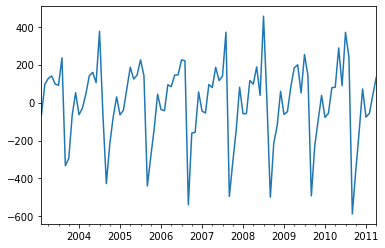

In [5]:
y_diff = y.diff()[:100].dropna()
y_diff.plot()

In [48]:
from statsmodels.tsa import stattools

# トレンド項あり（2次まで）、定数項ありの場合
ctt = stattools.adfuller(y_diff, regression="ctt")
# トレンド項あり（1次）、定数項ありの場合
ct = stattools.adfuller(y_diff, regression="ct")
# トレンド項なし、定数項ありの場合
c = stattools.adfuller(y_diff, regression="c")
# トレンド項なし、定数項なしの場合
nc = stattools.adfuller(y_diff, regression="nc")

print("ctt: ")
print(ctt)
print("ct: ")
print(ct)
print("c: ")
print(c)
print("nc: ")
print(nc)

ctt: 
(-20.49413879057406, 0.0, 10, 88, {'1%': -4.507929662788786, '5%': -3.9012866601709244, '10%': -3.595623127758734}, 994.1683226214956)
ct: 
(-20.51282538674093, 0.0, 10, 88, {'1%': -4.065513968057382, '5%': -3.4616143302732905, '10%': -3.156971502864388}, 992.6851493902557)
c: 
(-20.635999245555652, 0.0, 10, 88, {'1%': -3.506944401824286, '5%': -2.894989819214876, '10%': -2.584614550619835}, 990.9785010415186)
nc: 
(-20.337724459102372, 0.0, 10, 88, {'1%': -2.5916151807851238, '5%': -1.944440985689801, '10%': -1.614115063626972}, 991.6754513068397)


/Users/s02435/ghq/github.com/nnao45/jaist-my-jupyter/.venv/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:821: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  warnings.warn(


In [10]:
from statsmodels.tsa import ar_model

for i in range(20):
    model = ar_model.AR(y_diff)
    results = model.fit(maxlag=i+1)
    print('index: ', i+1, 'aic: ',results.aic)

index:  1 aic:  10.623349835083612
index:  2 aic:  10.605625887136187
index:  3 aic:  10.631794365499909
index:  4 aic:  10.653968819566964
index:  5 aic:  10.639020494849978
index:  6 aic:  10.497805079154896
index:  7 aic:  10.50164556083358
index:  8 aic:  10.347418412668333
index:  9 aic:  10.145773136713263
index:  10 aic:  9.547393191591683
index:  11 aic:  8.688494352586085
index:  12 aic:  8.726168706454176
index:  13 aic:  8.749080458269447
index:  14 aic:  8.787463716774608
index:  15 aic:  8.822181088075927
index:  16 aic:  8.861619646480914
index:  17 aic:  8.900710667979508
index:  18 aic:  8.712739176754758
index:  19 aic:  8.74636247304398
index:  20 aic:  8.766450545272324


In [12]:
model = ar_model.AR(y_diff)
results = model.fit(maxlag=20, ic='aic')
results.k_ar

11

<BarContainer object of 88 artists>

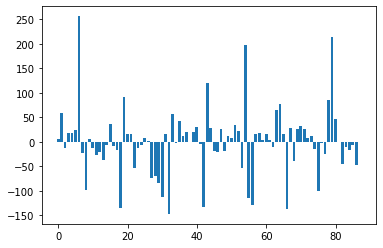

In [13]:
# 残差
res11 = results.resid
# 残差の出力
plt.bar(range(len(res11)), res11)

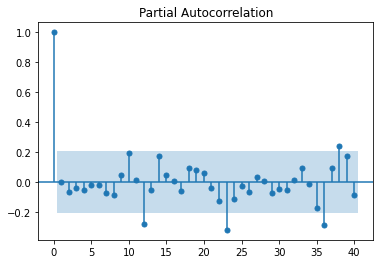

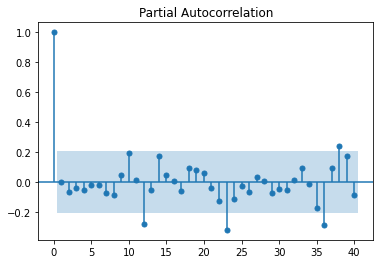

In [14]:
from statsmodels.graphics import tsaplots

tsaplots.plot_pacf(res11, lags=40)

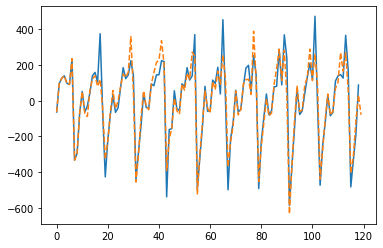

In [16]:
# 原系列
plt.plot(y.diff().dropna().values, label='observation')

# １時点から１１時点の原系列、モデルの当て嵌めに使用したデータ
# AR(11)モデルによる推定値と連結した結果

plt.plot(np.hstack([y_diff[:11], results.fittedvalues, results.predict(98-11, 107, dynamic=True)]), '--', label='forecast')